# Exploratory Data Analysis

In [4]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# import Dataset
df = sns.load_dataset("titanic")

In [6]:
#step 1:- Check Data Composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
#Number of unique values in Dataset
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
#Number of unique values in a Column
# df.survived.unique()
df["survived"].unique()

array([0, 1], dtype=int64)

In [11]:
#for specific value
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [12]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [14]:
df["age"].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [46]:
#to get the maximum value in the coloumn
max(df["age"])

80.0

In [16]:
# making different age groups
# create bin ages
bins = [0,5,10,15, 18, 40,80]
labels = ['0-5', '6-10', '11-15', '16-18', '19-40', '41-80']

#add new column
df["age_group"] = pd.cut(df["age"], bins = bins, labels = labels)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,19-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,19-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,19-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,19-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,19-40


In [17]:
#finding the maximum age where 'who' is child..
df[df['who'] == "child"]['age'].min()

0.42

In [18]:
#for columns
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group'],
      dtype='object')

In [19]:
df["age_group"].value_counts()

age_group
19-40    425
41-80    150
16-18     56
0-5       44
6-10      20
11-15     19
Name: count, dtype: int64

In [20]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [21]:
df.groupby("who")[["age_group", "class"]].value_counts().unstack()

class            First  Second  Third
who   age_group                      
child 0-5            3      13     28
      6-10           0       4     16
      11-15          3       2     14
      16-18          0       0      0
      19-40          0       0      0
      41-80          0       0      0
man   0-5            0       0      0
      6-10           0       0      0
      11-15          0       0      0
      16-18          2       6     23
      19-40         46      63    171
      41-80         50      21     31
woman 0-5            0       0      0
      6-10           0       0      0
      11-15          0       0      0
      16-18          8       4     13
      19-40         48      47     50
      41-80         26      13      9

In [22]:
df.groupby("who")[["survived", "class"]].value_counts().unstack()

class           First  Second  Third
who   survived                      
child 0             1       0     33
      1             5      19     25
man   0            77      91    281
      1            42       8     38
woman 0             2       6     58
      1            89      60     56

In [23]:
df.groupby("who")[["survived", "class", "alone"]].value_counts().unstack()

alone                  False  True 
who   survived class               
child 0        First       1      0
               Second      0      0
               Third      31      2
      1        First       5      0
               Second     19      0
               Third      21      4
man   0        First      27     50
               Second     26     65
               Third      50    231
      1        First      17     25
               Second      1      7
               Third       6     32
woman 0        First       1      1
               Second      3      3
               Third      36     22
      1        First      56     33
               Second     31     29
               Third      23     33

<Axes: xlabel='age', ylabel='fare'>

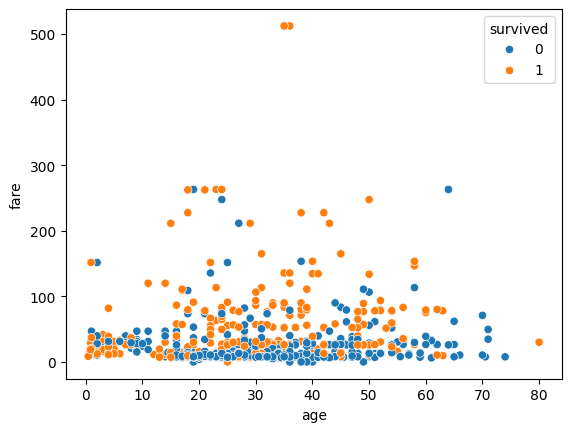

In [24]:
#Plots
# scatterplot is always made between 2 Numeric Variables.

sns.scatterplot(data=df, x="age", y="fare", hue="survived")

In [25]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
import plotly.express as px

In [27]:
fig = px.scatter(df, x="age", y="fare", color = "who")
fig.show()

In [28]:
fig = px.box(df, x="survived", y="fare", color = "who")
fig.show()

In [29]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='age_group', ylabel='count'>

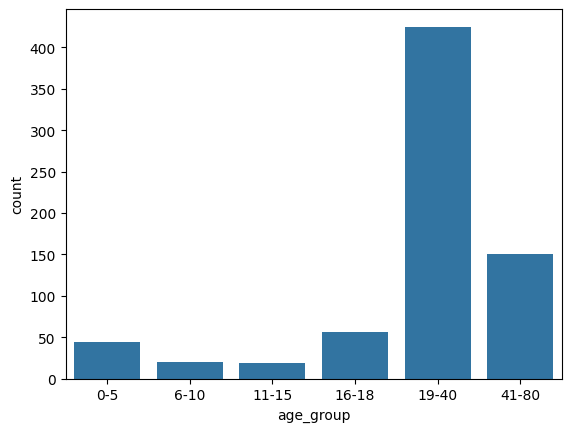

In [30]:
sns.countplot(df, x="age_group")

<Axes: xlabel='age', ylabel='Count'>

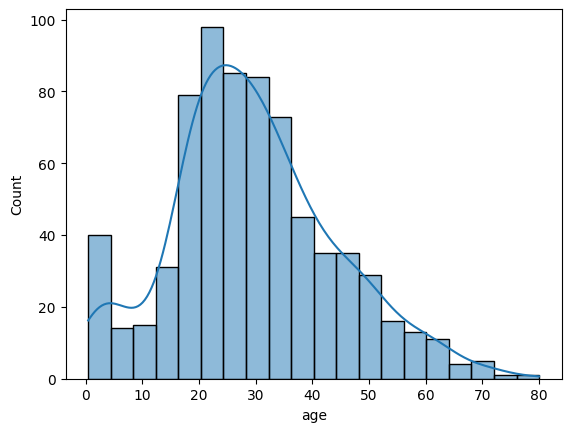

In [31]:
# Distribution
sns.histplot(df, x= "age", kde=True)

# Impute Null Values in Python

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
# Find the null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
#percentage
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [35]:
#remove the column with most missing values
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [36]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']]

In [37]:
df.drop(columns='deck', inplace=True)

In [38]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

# Fill na with mode


In [39]:
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_3628\1592829824.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [40]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_3628\3995229981.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Fill na with mean, median or mode

In [41]:
df["age"].fillna(df["age"].mean(), inplace=True)
df["age"].fillna(df["age"].median(), inplace=True)
df["age"].fillna(df["age"].mode(), inplace=True)

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_3628\658864391.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_3628\658864391.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

# Replacing with a Constant


In [42]:
df["age"].fillna(value=29, inplace=True)

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_3628\1017544151.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [43]:
# Interpolation (Linear)
# Calcuting the missing values in respect of forward and backward values.. i.e 29,30, na, 32 ... :- 31
# Forward Fill, reverse Fill

df["age"] = df["age"].fillna("age").interpolate(method="linear")